## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Reading data

In [2]:
# reading training data to train_df
train_df = pd.read_csv('/content/drive/MyDrive/Project/train.csv')

# reading test data to test_df
test_df = pd.read_csv('/content/drive/MyDrive/Project/test.csv')

# reading data description to data_description
data_description = open('/content/drive/MyDrive/Project/data_description.txt')

In [ ]:
# printing the data description
for line in data_description.readlines():
  print(line)

In [4]:
# checking the shape of train, test data sets
print("Rows, columns in training data: ",train_df.shape)
print("Rows, columns in test data: ",test_df.shape)

# checking if the columns in train data set are same as the columns in the test data set
print("Are columns in trainig set same as the columns in test set: ", np.all(train_df.columns[0:80] == test_df.columns))

Rows, columns in training data:  (1460, 81)
Rows, columns in test data:  (1459, 80)
Are columns in trainig set same as the columns in test set:  True


Trainig data has 81 columns including target variable SalePrice, and as the test data is used to predict the target variable, SalePrice column will not be available in test data resulting in 80 columns.

In [5]:
# having a look at the first 5 columns of train data set
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# having a look at the first 5 columns of test data set
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# Save test IDs for submission and remove from the dataframes
test_ids = pd.Series(test_df['Id'])

## Explore data

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

From data descsription we can see that MSSubClass is a categorical variable and OverallQual, OverallCond columns are of type ordinal, so they should be of type object, but are misinterpreted as type int64.

Let us modify the data type of these columns before proceeding further.

In [10]:
def change_dtype(df, column_name, dtype = 'object'):
  df[column_name] = df[column_name].astype(dtype)

cols_to_be_updated = ['MSSubClass', 'OverallQual', 'OverallCond']

for col in cols_to_be_updated:
  change_dtype(train_df, col)
  change_dtype(test_df, col)


In [11]:
# checking if the dtype is updated or not
train_df['MSSubClass'].dtype

dtype('O')

We can observe that there are missing values in the data, let us understand what columns have missing values.

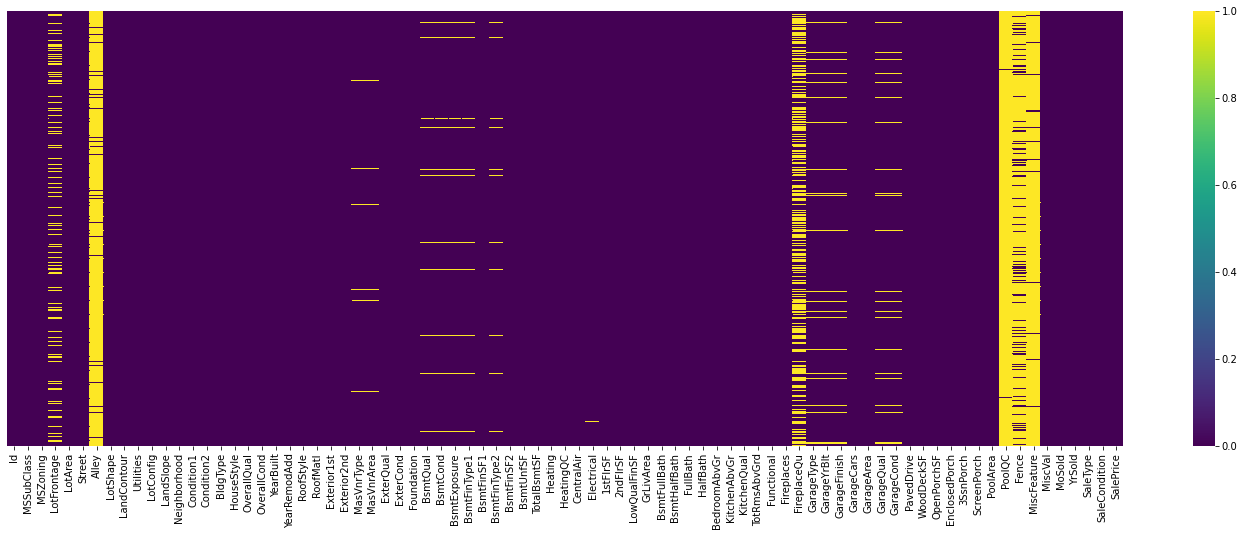

In [12]:
# plotting a heatmap which gives information about null values in train data
plt.figure(figsize=(25,8))
sns.heatmap(train_df.isnull(), yticklabels='', cmap='viridis')

In [13]:
# function that returns the columns with missing values and the percentage of missing values
def get_missing_cols_info(df):
  missing_data = np.round((df.isnull().sum()/df.shape[0])*100, 2)
  return pd.DataFrame(missing_data[missing_data.values>0], columns=['missing values in %']).sort_values(by=['missing values in %'], ascending=False)

Checking if there are any missing values of type numeric in train and test data set

In [14]:
get_missing_cols_info(train_df.select_dtypes(exclude='object'))

,missing values in %
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrArea,0.55


In [15]:
get_missing_cols_info(test_df.select_dtypes(exclude='object'))

,missing values in %
LotFrontage,15.56
GarageYrBlt,5.35
MasVnrArea,1.03
BsmtFullBath,0.14
BsmtHalfBath,0.14
BsmtFinSF1,0.07
BsmtFinSF2,0.07
BsmtUnfSF,0.07
TotalBsmtSF,0.07
GarageCars,0.07


Checking if there are any missing values of type object in train and test data set

In [16]:
get_missing_cols_info(train_df.select_dtypes('object'))

,missing values in %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtExposure,2.60


In [17]:
get_missing_cols_info(test_df.select_dtypes('object'))

,missing values in %
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
FireplaceQu,50.03
GarageCond,5.35
GarageQual,5.35
GarageFinish,5.35
GarageType,5.21
BsmtCond,3.08


## Imputing missing values

From the data description, it can be observed that the NA in below mentioned columns have another meaning and should be imputed in a different way

Alley: Type of alley access to property (NA - No alley access)

BsmtExposure - Evaluates the height of the basement (NA - No basement)

BsmtFinType1 - Rating of basement finished area (NA - No basement)

BsmtFinType2 - Rating of basement finished area (if multiple types) (NA - No basement)

BsmtQual: Evaluates the height of the basement (NA - No basement)

BsmtCond: Evaluates the general condition of the basement (NA - No basement)

FireplaceQu: Fireplace quality (NA - No Fireplace)

GarageCond: Garage condition (NA - No garage)

GarageFinish - Interior finish of the garage (NA - No Garage)

GarageType - Garage location (NA - No Garage)

GarageQual: Garage quality (NA - No garage)

PoolQC: Pool quality (NA - No Pool)

Fence: Fence quality (NA - No Fence)

MasVnrType: Masonry veneer type (NaN - None)

MiscFeature: Miscellaneous feature not covered in other categories (NA - None)

These columns can be considered as special categorical varibales and if there are any missing values in these columns, they can be imputed by replacing 'null values' with string 'None'.

In [18]:
special_categorical_cols = ['Alley',
                            'BsmtExposure',
                            'BsmtFinType1',
                            'BsmtFinType2',
                            'BsmtQual',
                            'BsmtCond',
                            'FireplaceQu',
                            'GarageCond',
                            'GarageFinish',
                            'GarageType',
                            'GarageQual',
                            'PoolQC',
                            'Fence',
                            'MasVnrType',
                            'MiscFeature'
                            ]

In [19]:
# remaining categorical columns can be considered as normal categorical variables
#np.all(train_df.select_dtypes(include='object').columns == test_df.select_dtypes(include='object').columns)
normal_categorical_cols = list(set(train_df.select_dtypes(include='object').columns).difference(special_categorical_cols))

The missing values in the below mentioned columns can be due to the absence of that fetaure, for example, if a house does not have Garage, then GarageCars, GarageArea values will miss and these imputed be treated differently.

**GarageYrBlt**: Year garage was built

**MasVnrArea**: Masonry veneer area in square feet

**BsmtFullBath**: Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms

**BsmtFinSF1**: Type 1 finished square feet

**BsmtFinSF2**: Type 2 finished square feet

**BsmtUnfSF**: Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

In [20]:
special_numeric_cols = [ 'GarageYrBlt',
                        'MasVnrArea',
                        'BsmtFullBath',
                        'BsmtHalfBath',
                        'BsmtFinSF1',
                        'BsmtFinSF2',
                        'BsmtUnfSF',
                        'TotalBsmtSF',
                        'GarageCars',
                        'GarageArea'
                        ]

In [21]:
# remaining numeric columns can be considered as normal numerical variables
normal_categorical_cols = list(set(train_df.select_dtypes(exclude='object').columns).difference(special_numeric_cols))

In [22]:
# replacing NA in special_categorical_cols with None
train_df[special_categorical_cols] = train_df[special_categorical_cols].replace([np.NaN], 'None')
test_df[special_categorical_cols] = test_df[special_categorical_cols].replace([np.NaN], 'None')

In [23]:
# Replacing missing values in special numeric columns with 0

def replace_special_numeric_null_vals(df):
  # Fectching all the rows without garage
  rows_with_no_garage = (np.where(df['GarageCond'] == 'None')  or np.where(df['GarageFinish'] == 'None') or np.where(df['GarageType'] == 'None') or np.where(df['GarageQual'] == 'None'))[0]
  
  # Fectching all the rows without garage
  rows_with_no_basement = (np.where(df['BsmtExposure'] == 'None')  or np.where(df['BsmtFinType1'] == 'None') or np.where(df['BsmtFinType2'] == 'None') or np.where(df['BsmtQual'] == 'None') or np.where(df['BsmtCond'] == 'None'))[0]
  
  # Fectching all the rows with no Masonry veneer area
  rows_with_no_mas_vnr = (np.where(df['MasVnrType'] == 'None'))[0]

  # Assigning valid_null_vals to the rows retrieved above, based on the column
  # For example, if the column name has string Garage, it means that the column is related to Garage and hence assigning valid_null_vals to rows with no garage
  for col in special_numeric_cols:
    if('Garage' in col):
      valid_null_vals = rows_with_no_garage
    elif('Bsmt' in col):
      valid_null_vals = rows_with_no_basement
    elif('MasVnr' in col):
      valid_null_vals = rows_with_no_mas_vnr
    
    # Updating the respective value to 0
    df.at[valid_null_vals, col] = 0

In [24]:
replace_special_numeric_null_vals(train_df)
replace_special_numeric_null_vals(test_df)

Checking missing values after replacing special categorical and numerical column values

In [25]:
get_missing_cols_info(train_df)

,missing values in %
LotFrontage,17.74
Electrical,0.07


In [26]:
get_missing_cols_info(test_df)

,missing values in %
LotFrontage,15.56
MSZoning,0.27
Utilities,0.14
Functional,0.14
Exterior1st,0.07
Exterior2nd,0.07
KitchenQual,0.07
SaleType,0.07


The missing values in these remaining columns can be replaced with


*   median if the column is of type integer
*   mode if the colum is of type category



In [27]:
def impute_missing_vals(df):
  missing_info_df = get_missing_cols_info(df)
  for columns in missing_info_df:
    for col in missing_info_df.index:
      if (df[col].dtype == 'object'):
        df[col] = df[col].replace([np.NaN], df[col].mode()[0])
      else:
        df[col] = df[col].replace([np.NaN], df[col].median())

In [28]:
impute_missing_vals(train_df)
impute_missing_vals(test_df)

In [29]:
get_missing_cols_info(train_df)

,missing values in %


In [30]:
get_missing_cols_info(test_df)

,missing values in %


## Save data

In [31]:
# pickle preprocessed train data
train_df.to_pickle('/content/drive/MyDrive/Project/train_preprocessed.pkl')

# pickle preprocessed test data
test_df.to_pickle('/content/drive/MyDrive/Project/test_preprocessed.pkl')

# Save test IDs for submission
test_ids.to_pickle('/content/drive/MyDrive/Project/test_ids.pkl')